In [1]:
from ray.tune.analysis import Analysis
from matplotlib import pyplot as plt
import plotly.express as px
from datetime import datetime
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
analysis = Analysis("/home/sergei/ray_results/bursts/")

In [3]:
target = 'policy_reward_mean/adversary'

In [4]:
df = analysis.dataframe(metric=target, mode=None)

In [5]:
df.columns

Index(['episode_reward_max', 'episode_reward_min', 'episode_reward_mean',
       'episode_len_mean', 'episodes_this_iter', 'num_healthy_workers',
       'timesteps_total', 'done', 'episodes_total', 'training_iteration',
       'experiment_id', 'date', 'timestamp', 'time_this_iter_s',
       'time_total_s', 'pid', 'hostname', 'node_ip', 'time_since_restore',
       'timesteps_since_restore', 'iterations_since_restore', 'trial_id',
       'experiment_tag', 'policy_reward_min/victim',
       'policy_reward_min/adversary', 'policy_reward_max/victim',
       'policy_reward_max/adversary', 'policy_reward_mean/victim',
       'policy_reward_mean/adversary', 'hist_stats/episode_reward',
       'hist_stats/episode_lengths', 'hist_stats/policy_victim_reward',
       'hist_stats/policy_adversary_reward', 'sampler_perf/mean_env_wait_ms',
       'sampler_perf/mean_processing_ms', 'sampler_perf/mean_inference_ms',
       'timers/sample_time_ms', 'timers/sample_throughput',
       'timers/learn_time_

In [6]:
df['logdir']

0      /home/sergei/ray_results/bursts/train_one_283_...
1      /home/sergei/ray_results/bursts/train_one_98_b...
2      /home/sergei/ray_results/bursts/train_one_96_b...
3      /home/sergei/ray_results/bursts/train_one_125_...
4      /home/sergei/ray_results/bursts/train_one_307_...
                             ...                        
345    /home/sergei/ray_results/bursts/train_one_310_...
346    /home/sergei/ray_results/bursts/train_one_131_...
347    /home/sergei/ray_results/bursts/train_one_326_...
348    /home/sergei/ray_results/bursts/train_one_42_b...
349    /home/sergei/ray_results/bursts/train_one_114_...
Name: logdir, Length: 350, dtype: object

In [7]:
for k in df.columns:
#     if k.startswith('episode'):
#         del df[k]
    if not (k.startswith('config') or k == target):
        del df[k]

In [8]:
df = df.sort_values(target, ascending=False)

In [9]:
df

policy_reward_mean/adversary  config/burst_size  config/fc_units  \
242                      9.857143                 18              100   
319                      9.678571                 20              100   
144                      9.561905                 15              100   
62                       9.466667                 20              100   
149                      9.459524                 15              100   
..                            ...                ...              ...   
304                      0.050000                 21              100   
273                      0.026190                 28              100   
39                      -0.057143                 29              100   
281                     -0.080952                 22              100   
117                     -0.157143                 25              100   

     config/lstm_units  config/num_workers  config/train_batch_size  \
242                 22                  10                     4096   
319                 22                  10                     4096   
144                 22                  10                     4096   
62                  22                  10                     4096   
149                 22                  10                     4096   
..                 ...                 ...                      ...   
304                 22                  10                     4096   
273                 22                  10                     4096   
39                  22                  10                     4096   
281                 22                  10                     4096   
117                 22                  10                     4096   

     config/train_steps  
242                  40  
319                  40  
144                  40  
62                   40  
149                  40  
..                  ...  
304                  40  
273                  40  
39                   40  
281                  40  
117                  40  

[350 rows x 7 columns]

(array([78., 67., 38., 25., 25., 22., 18., 26., 30., 21.]),
 array([-0.15714286,  0.84428571,  1.84571429,  2.84714286,  3.84857143,
         4.85      ,  5.85142857,  6.85285714,  7.85428571,  8.85571429,
         9.85714286]),
 <a list of 10 Patch objects>)

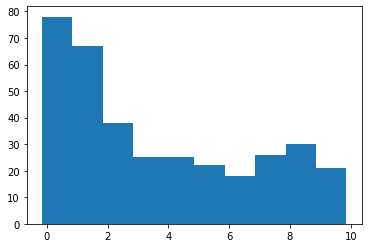

In [10]:
plt.hist(df[target])

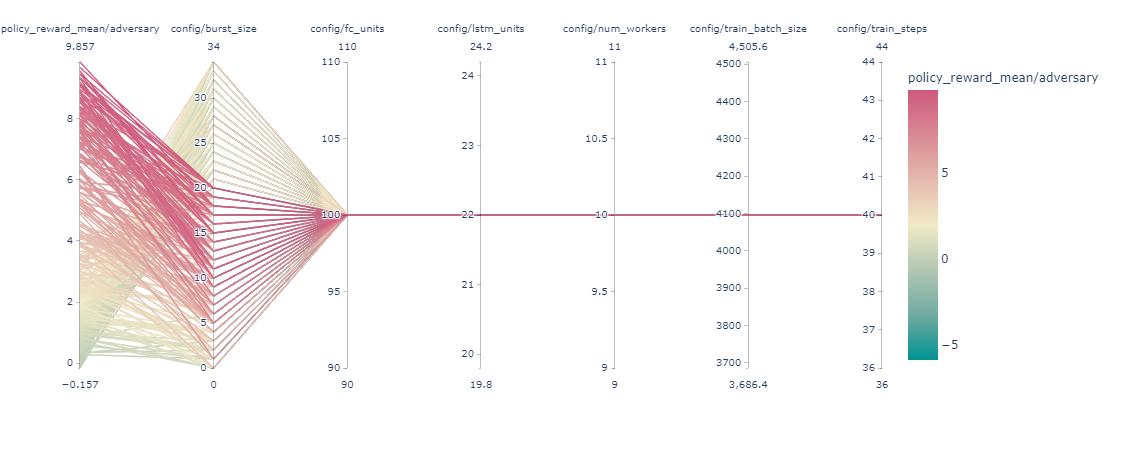

In [11]:
fig = px.parallel_coordinates(df, color=target,
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()

In [12]:
df.iloc[0]

policy_reward_mean/adversary       9.857143
config/burst_size                 18.000000
config/fc_units                  100.000000
config/lstm_units                 22.000000
config/num_workers                10.000000
config/train_batch_size         4096.000000
config/train_steps                40.000000
Name: 242, dtype: float64

In [13]:
df

policy_reward_mean/adversary  config/burst_size  config/fc_units  \
242                      9.857143                 18              100   
319                      9.678571                 20              100   
144                      9.561905                 15              100   
62                       9.466667                 20              100   
149                      9.459524                 15              100   
..                            ...                ...              ...   
304                      0.050000                 21              100   
273                      0.026190                 28              100   
39                      -0.057143                 29              100   
281                     -0.080952                 22              100   
117                     -0.157143                 25              100   

     config/lstm_units  config/num_workers  config/train_batch_size  \
242                 22                  10                     4096   
319                 22                  10                     4096   
144                 22                  10                     4096   
62                  22                  10                     4096   
149                 22                  10                     4096   
..                 ...                 ...                      ...   
304                 22                  10                     4096   
273                 22                  10                     4096   
39                  22                  10                     4096   
281                 22                  10                     4096   
117                 22                  10                     4096   

     config/train_steps  
242                  40  
319                  40  
144                  40  
62                   40  
149                  40  
..                  ...  
304                  40  
273                  40  
39                   40  
281                  40  
117                  40  

[350 rows x 7 columns]

(array([40., 30., 40., 30., 30., 40., 30., 40., 30., 40.]),
 array([ 0. ,  3.4,  6.8, 10.2, 13.6, 17. , 20.4, 23.8, 27.2, 30.6, 34. ]),
 <a list of 10 Patch objects>)

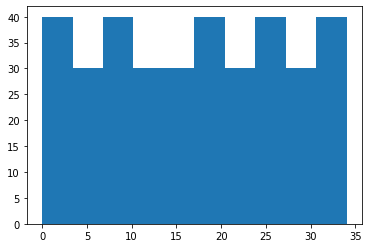

In [14]:
plt.hist(df['config/burst_size'])

In [15]:
dfs = analysis.trial_dataframes
df = analysis.dataframe(metric=target, mode=None)

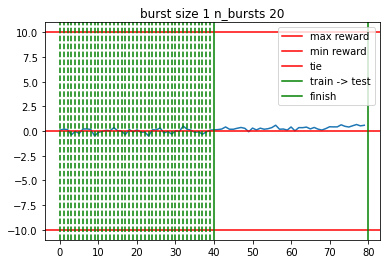

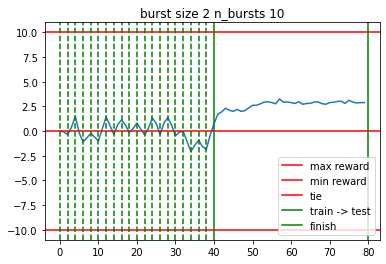

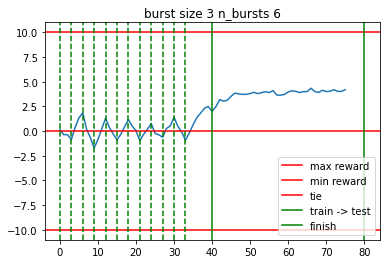

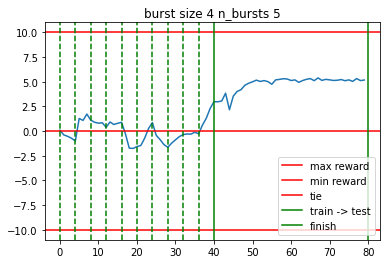

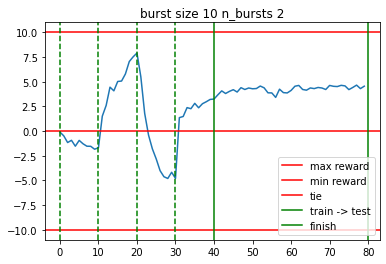

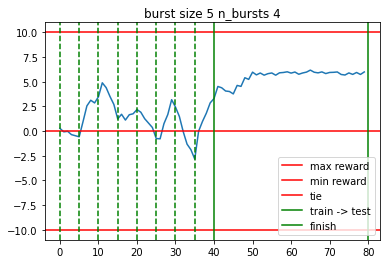

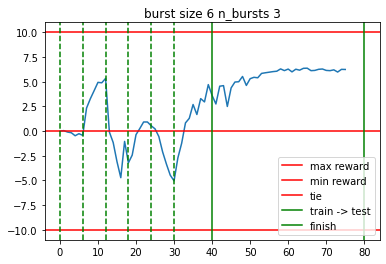

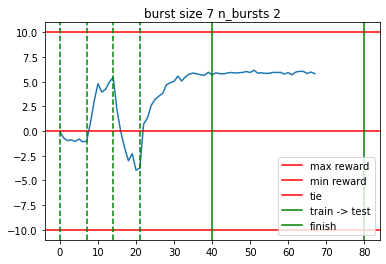

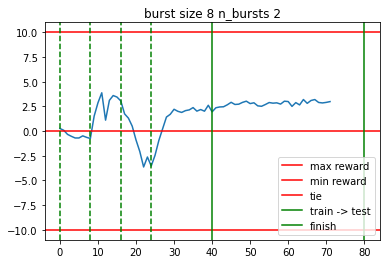

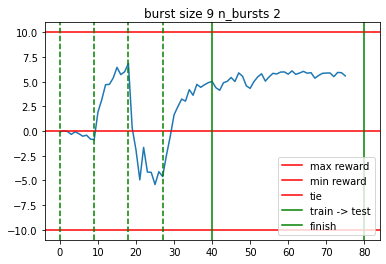

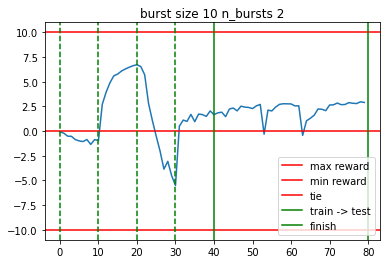

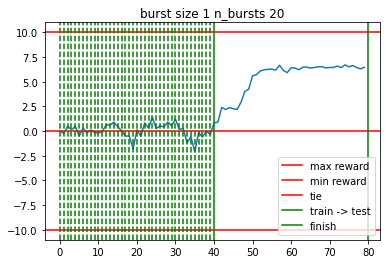

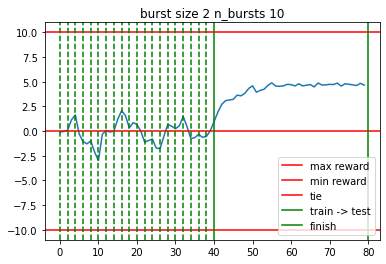

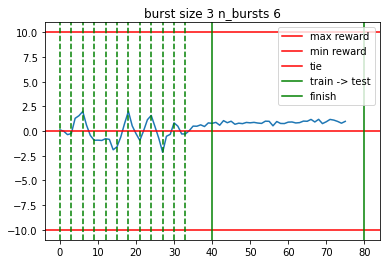

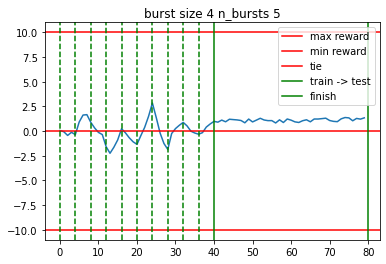

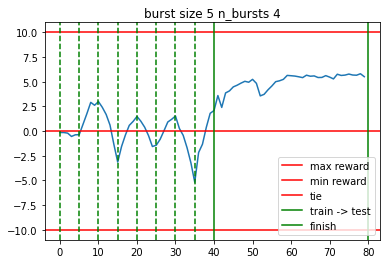

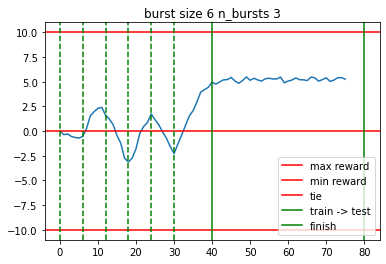

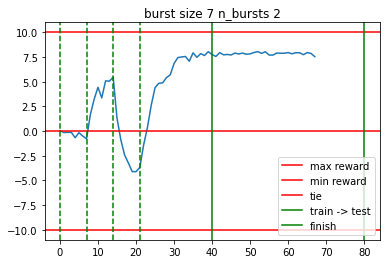

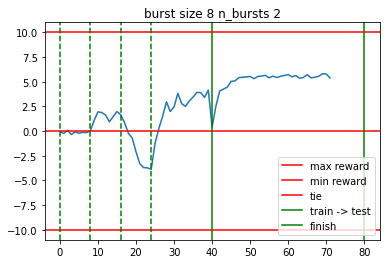

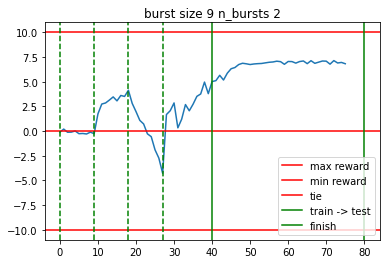

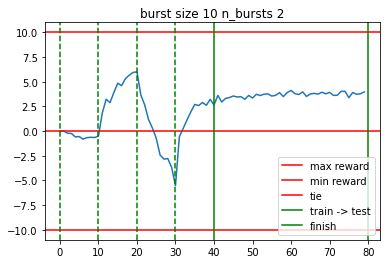

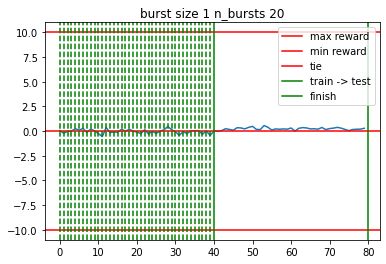

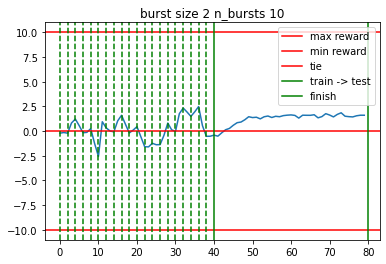

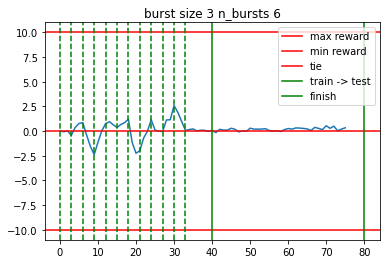

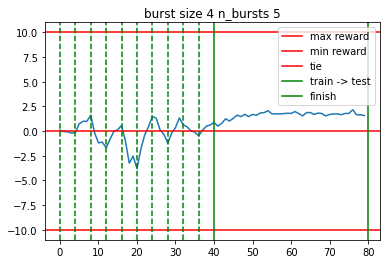

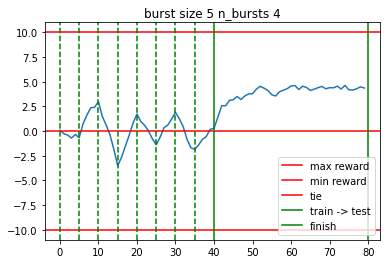

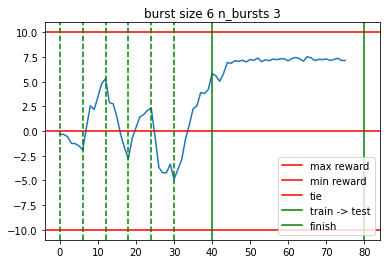

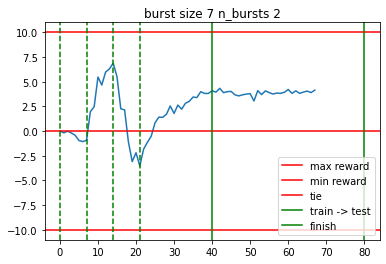

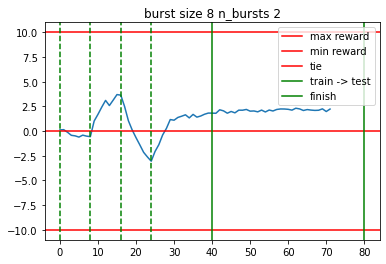

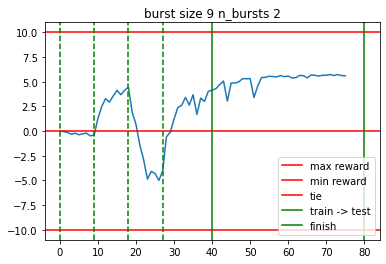

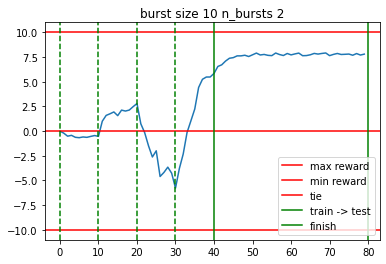

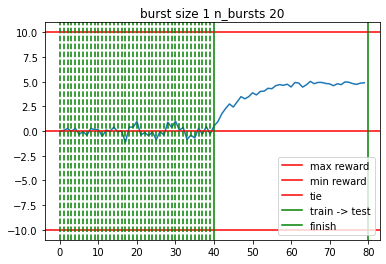

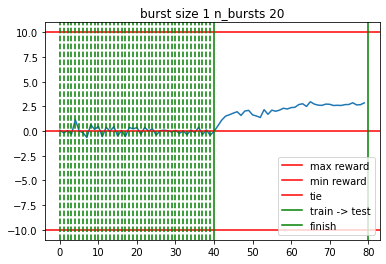

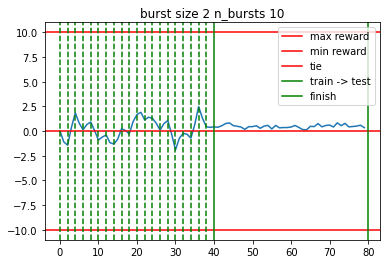

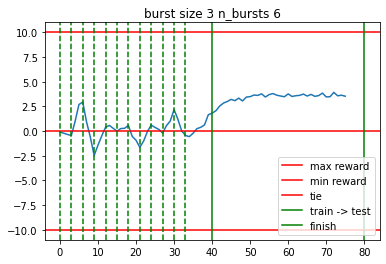

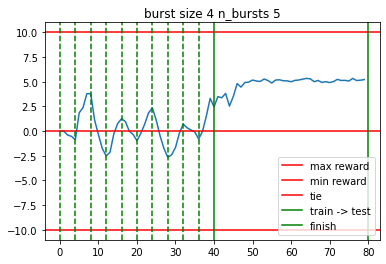

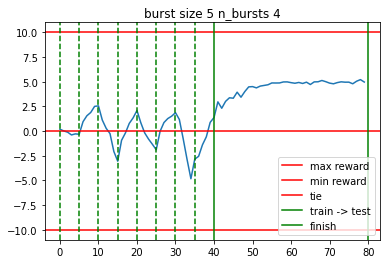

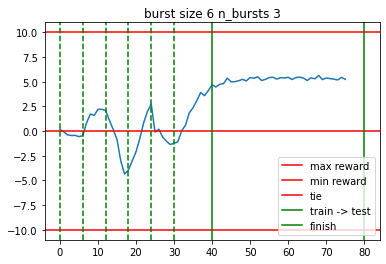

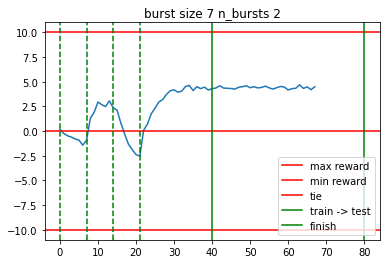

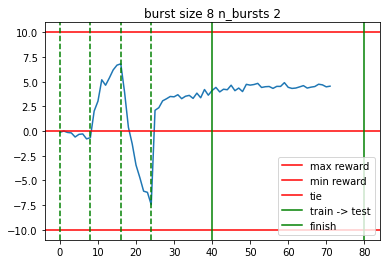

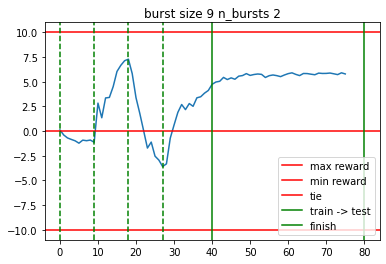

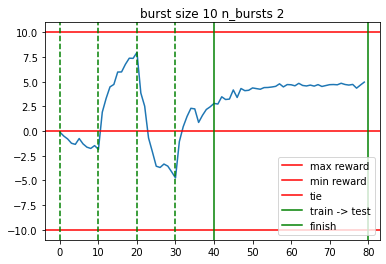

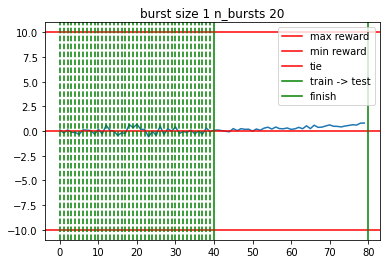

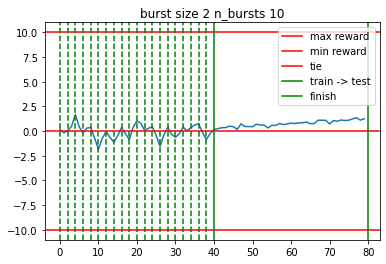

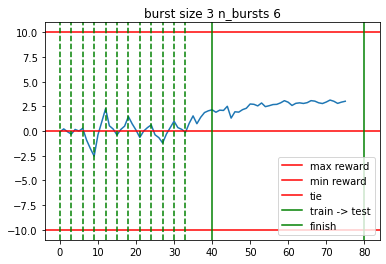

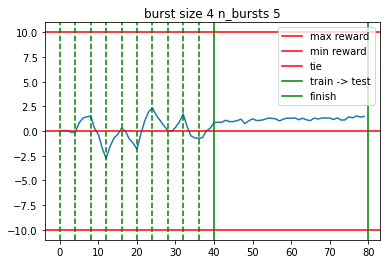

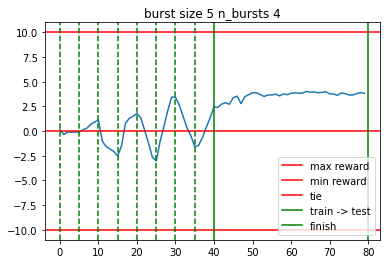

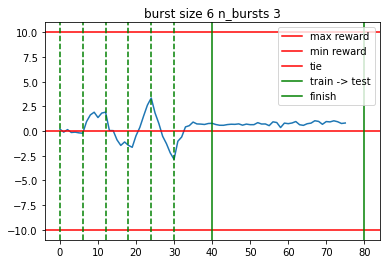

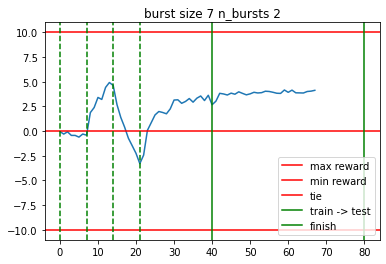

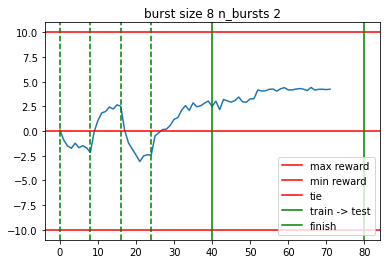

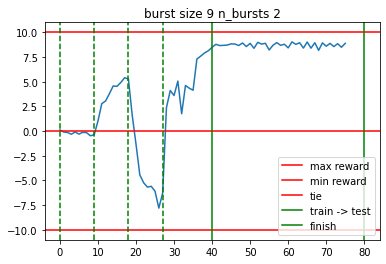

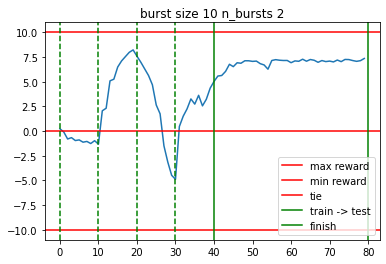

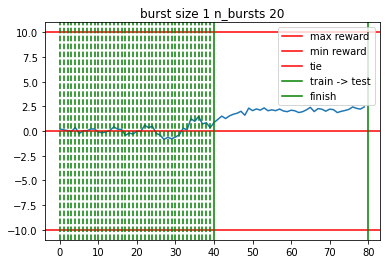

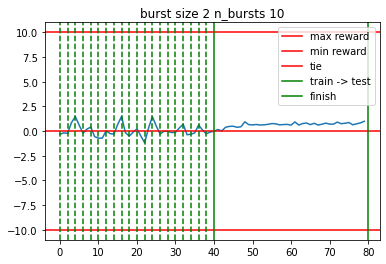

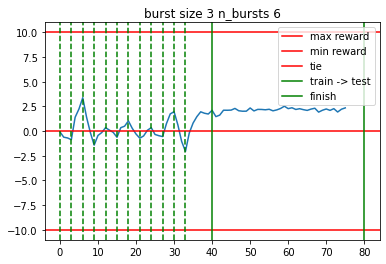

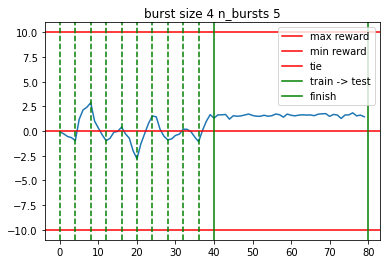

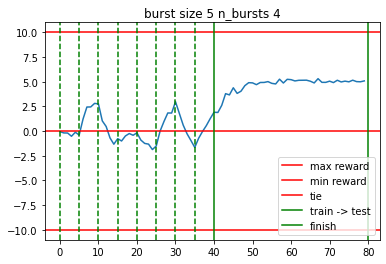

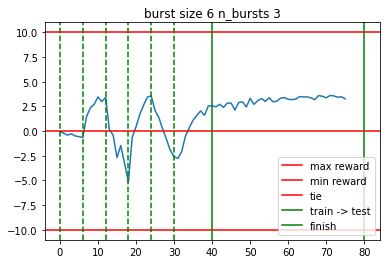

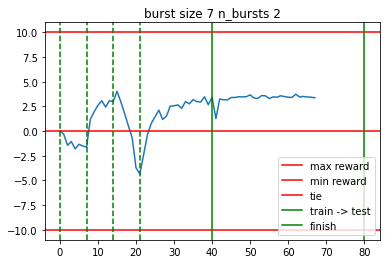

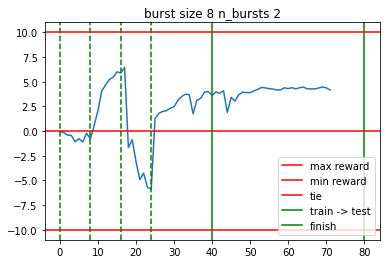

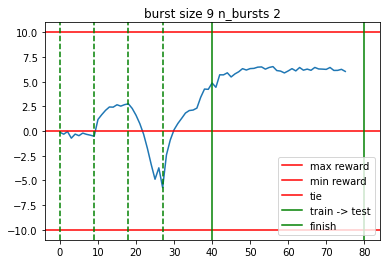

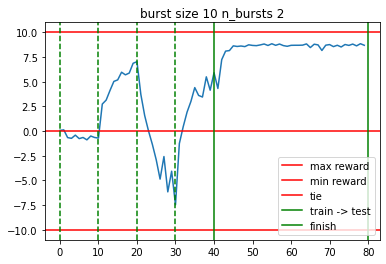

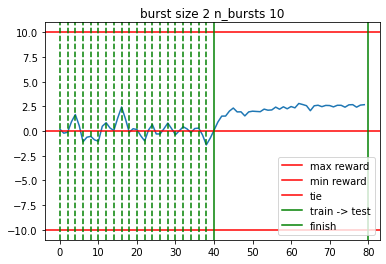

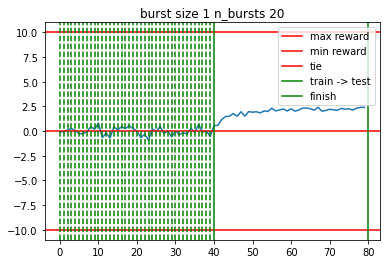

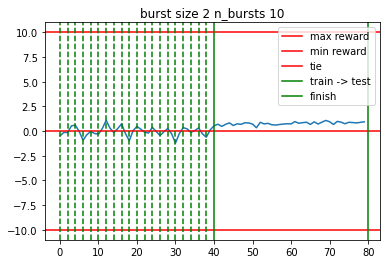

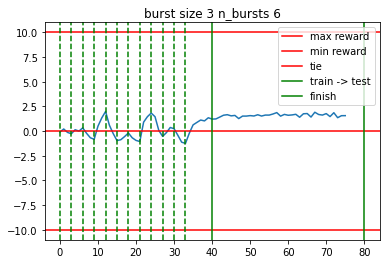

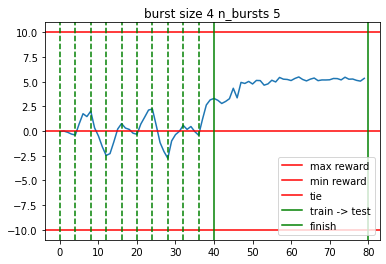

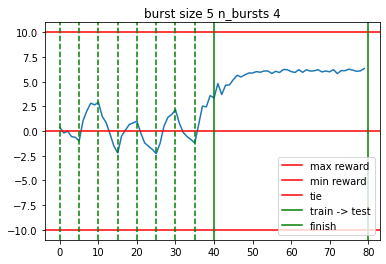

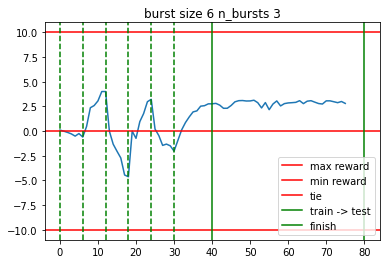

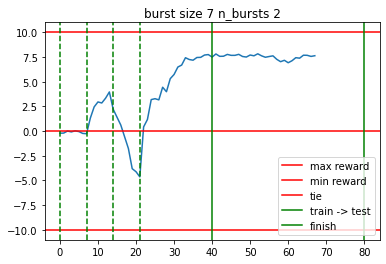

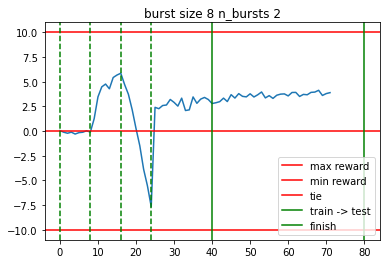

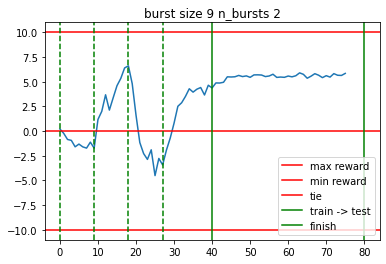

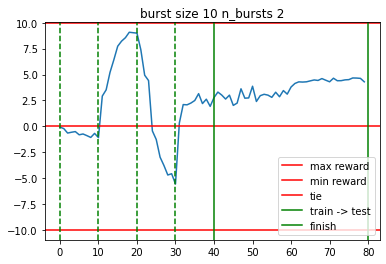

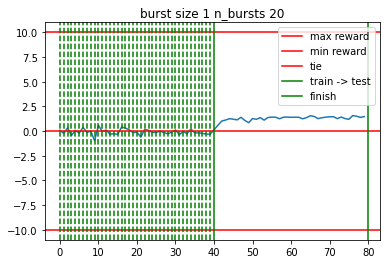

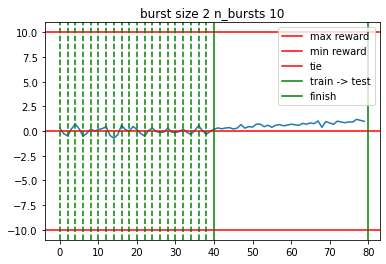

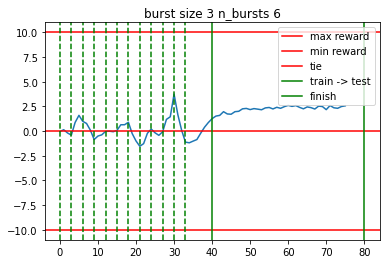

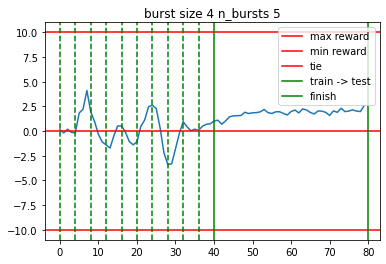

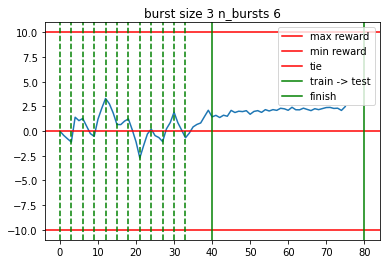

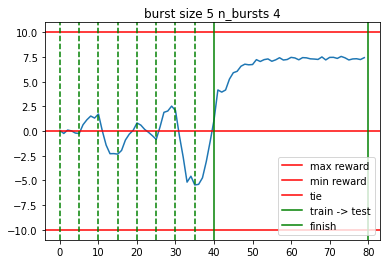

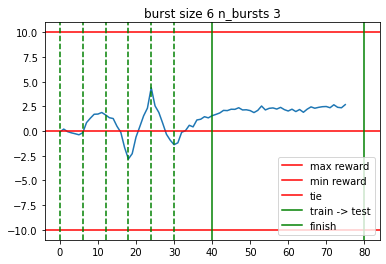

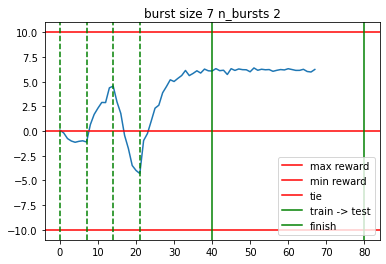

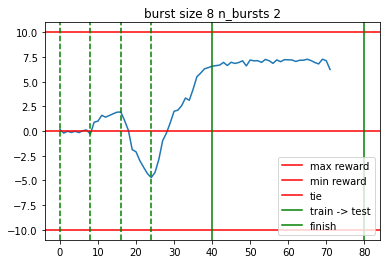

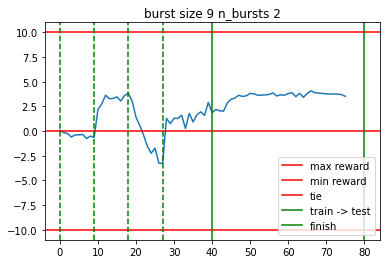

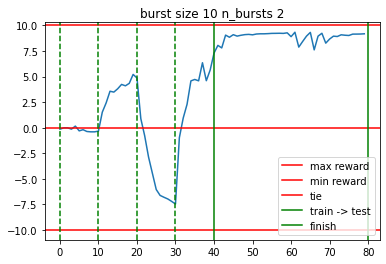

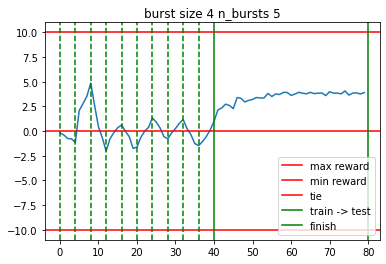

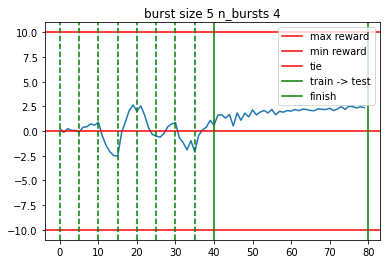

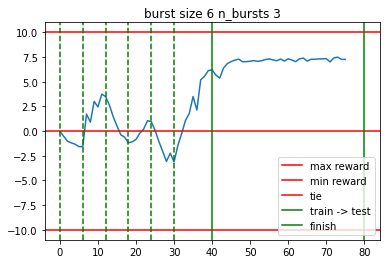

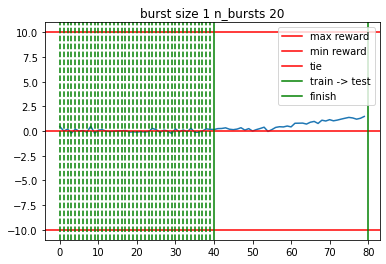

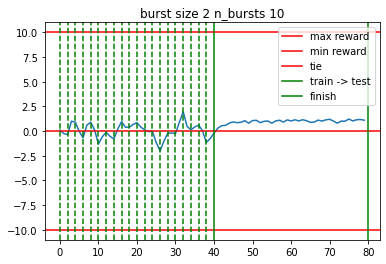

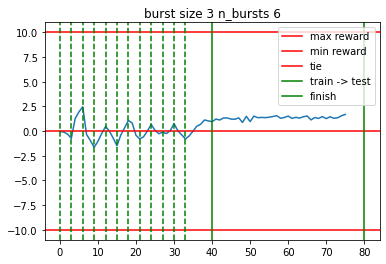

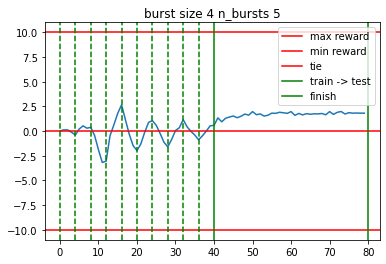

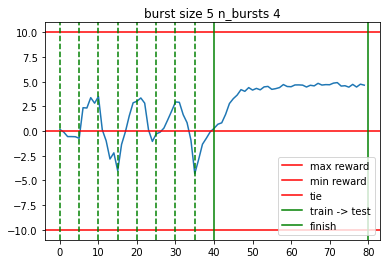

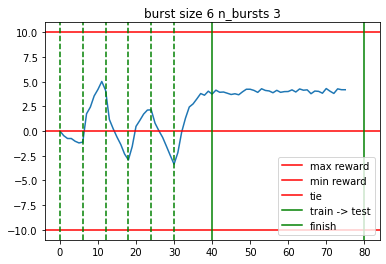

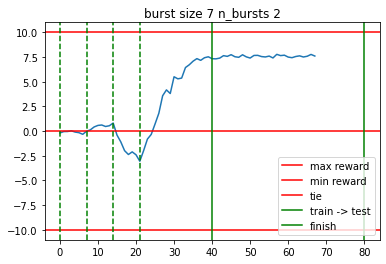

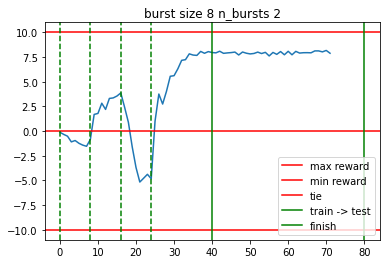

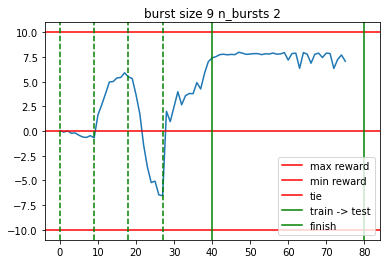

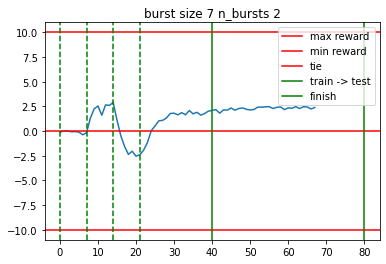

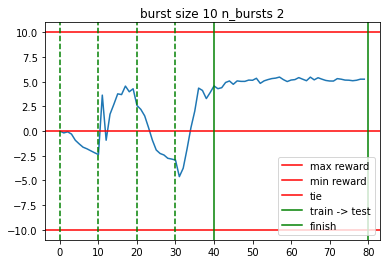

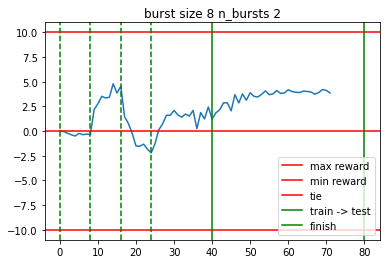

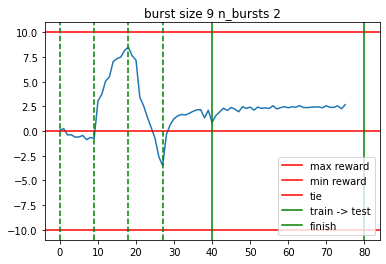

In [16]:
# mapping n_bursts to the result
results = []

for k in sorted(dfs.keys()):
    df1 = dfs[k]
    max(df1['info/num_steps_trained'])
    
    summary_row = df.loc[df.logdir == k]
    
    burst_size = int(summary_row['config/burst_size'])
    
    if burst_size == 0:
        continue
    
    train_steps = int(summary_row['config/train_steps'])
    start_time = datetime.fromtimestamp(int(df1['timestamp'].iloc[0])).strftime("%d/%m/%Y %H:%M:%S")
    n_bursts = train_steps // (2 * burst_size)
    
    if n_bursts == 0:
        continue
        
    if burst_size > 10:
        continue
        
    adversary_reward = df1[target]
        
    
    ar = adversary_reward[train_steps:]
    if len(ar) > 0:
        results.append({'n_bursts': n_bursts,
                        'adversary_reward': max(ar),
                        'burst_size': burst_size})

    plt.title("burst size %d n_bursts %d" % (burst_size, n_bursts))
    plt.plot(adversary_reward)
    plt.axhline(-10, color='red', label='max reward')
    plt.axhline(10, color='red', label='min reward')
    plt.axhline(0, color='red', label='tie')
    plt.axvline(train_steps, color='green', label='train -> test')
    plt.axvline(2 * train_steps, color='green', label='finish')

    curr_pt = 0
    for i in range(n_bursts):
        plt.axvline(curr_pt, ls='--', color='green')
        plt.axvline(curr_pt + burst_size, ls='--', color='green')
        curr_pt += 2 * burst_size
    
    plt.legend()
    plt.show()

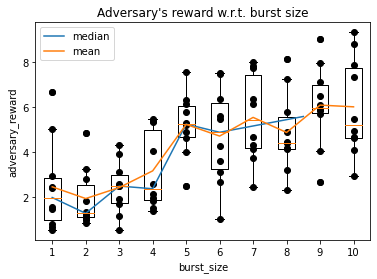

In [17]:
plt.title("Adversary's reward w.r.t. burst size")

df_results = pd.DataFrame(results)
xs = np.unique(df_results['burst_size'])
ys = [df_results.loc[df_results['burst_size'] == k]['adversary_reward'] for k in xs]

#sns.boxplot(x='n_bursts', y='adversary_reward', positions=np.unique(df_results['n_bursts']), data=df_results)

for x, ys_ in zip(xs, ys):
    plt.scatter([x] * len(ys_), ys_, color='black')

plt.boxplot(ys, positions=xs)

df_mean = df_results.groupby('n_bursts').median()
df_mean.reset_index(level=0, inplace=True)
df_mean
sns.lineplot(x='burst_size', y='adversary_reward', data=df_mean, label='median')

df_mean = df_results.groupby('burst_size').mean()
df_mean.reset_index(level=0, inplace=True)
df_mean
sns.lineplot(x='burst_size', y='adversary_reward', data=df_mean, label='mean')

plt.show()

In [18]:
np.unique(df_results['n_bursts'])

array([ 2,  3,  4,  5,  6, 10, 20])

(array([  0.,   0.,   0.,   0.,   0., 350.,   0.,   0.,   0.,   0.]),
 array([39.5, 39.6, 39.7, 39.8, 39.9, 40. , 40.1, 40.2, 40.3, 40.4, 40.5]),
 <a list of 10 Patch objects>)

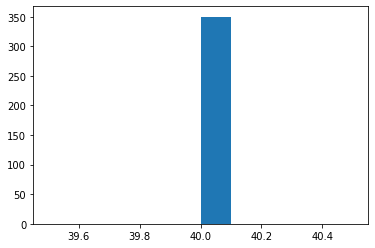

In [19]:
plt.hist(df['config/train_steps'])